In [1]:
import pandas as pd
# permite que una misma celda imprima varios resultados
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 20000)
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
feminism = pd.read_csv('/content/drive/My Drive/Tweeter/Datasets/feminism_tweets.csv', engine='python')

In [4]:
#feminism = pd.read_csv("feminism_tweets.csv")

In [5]:
print(len(feminism))
print(len(feminism["tweet.full_text"].unique()))

634383
193491


# Cobertura

In [6]:
print(len(feminism["tweet.full_text"]))
print(len(feminism["tweet.full_text"].dropna())) #Elimina los tweets que tienen valor NaN (not a number a.k.a. valor inválido) en la columna tweet.full_text

634383
566613


#### 1era cobertura

In [7]:
def get_text(tweet):
    if tweet["tweet.retweeted_status.text"] == tweet["tweet.retweeted_status.text"]:  
        return tweet["tweet.retweeted_status.text"]
    else:
        return tweet["tweet.full_text"]

In [8]:
feminism["full_text"] = feminism.apply(get_text, axis=1)

In [9]:
print(len(feminism["tweet.full_text"]))
print(len(feminism["full_text"].dropna()))

634383
616640


Veamos los tweets que aún nos aparecen como NaN en la columna full_text para ver a dónde podemos encontrar el texto de ese tweet:

In [10]:
feminism_filt1 = feminism[feminism['full_text'].isnull()]
feminism_filt1.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text
51,ObjectId(5e1f36f0914caa46502babd8),streaming,Wed Jan 15 15:59:38 +0000 2020,1217476445636874242,NaN,@sdx76 @YNB It makes lots of sense if you're a woman and have seen passive sexism without male privilege.,NaN,"[12,105]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""sdx76"",""name"":""A Man Named Speed"",""id"":17427561,""id_str"":""17427561"",""indices"":[0,6]},{""screen_name"":""YNB"",""name"":""yvette nicole brown"",""id"":23314049,""id_str"":""23314049"",""indices"":[7,11]}],""symbols"":[]}",3247183137,(((WalkingTaako))),WalkingTaako,"Pennsylvania, USA",False,186,852,6,NaN,35553,Tue May 12 03:55:14 +0000 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,ObjectId(5e1f36f4914caa46502bacfc),streaming,Wed Jan 15 15:59:42 +0000 2020,1217476462749650944,NaN,@Fdann3 @Muratolojii1 Bence feminist demek istedi 🤣,NaN,"[22,51]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""Fdann3"",""name"":""Fîdann🌱"",""id"":{""$numberLong"":""1195268234255179776""},""id_str"":""1195268234255179776"",""indices"":[0,7]},{""screen_name"":""Muratolojii1"",""name"":""Muratolojii"",""id"":{""$numberLong"":""1211298358226145281""},""id_str"":""1211298358226145281"",""indices"":[8,21]}],""symbols"":[]}",133890211,Mihêê❁ 📵,mehmetak63,"Bornova, İzmir",False,622,656,0,NaN,22631,Fri Apr 16 22:42:56 +0000 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,ObjectId(5e1f36f4914caa46502bad00),streaming,Wed Jan 15 15:59:43 +0000 2020,1217476463831764995,NaN,"@drfes7 @aisha_jamil @Jemima_Khan I am also inclined to disagree. We have massive problems with racism, sexism (and… https://t.co/zOXEpyEPmk","@drfes7 @aisha_jamil @Jemima_Khan I am also inclined to disagree. We have massive problems with racism, sexism (and a load of other isms to boot) in the uk.","[34,140]","{""hashtags"":[],""urls"":[{""url"":""https://t.co/zOXEpyEPmk"",""expanded_url"":""https://twitter.com/i/web/status/1217476463831764995"",""display_url"":""twitter.com/i/web/status/1…"",""indices"":[117,140]}],""user_mentions"":[{""screen_name"":""drfes7"",""name"":""Faisal Chaudhry"",""id"":365550668,""id_str"":""365550668"",""indices"":[0,7]},{""screen_name"":""aisha_jamil"",""name"":""Aisha Jamil"",""id"":119557767,""id_str"":""119557767"",""indices"":[8,20]},{""screen_name"":""Jemima_Khan"",""name"":""Jemima Goldsmith"",""id"":94628304,""id_str"":""94628304"",""indices"":[21,33]}],""symbols"":[]}",23106837,Zena West,ZenaWesty,Nottinghamshire,False,332,272,17,NaN,16560,Fri Mar 06 19:32:36 +0000 2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,ObjectId(5e1f36f4914caa46502bad02),streaming,Wed Jan 15 15:59:43 +0000 2020,1217476464527867904,NaN,@YNB Why should Warren have to shake Bernie’s hand? Men have done this forever. Lie about a wom

#### 2da cobertura

In [11]:
def get_text2(tweet):
    if tweet["tweet.extended_tweet.full_text"] == tweet["tweet.extended_tweet.full_text"]:  
        return tweet["tweet.extended_tweet.full_text"]
    else:
        return tweet["full_text"]

Nota: Voy a ir agregando una nueva columna por cada una de estas funcioncitas para ir viendo que vaya todo bien, después dejamos una sola

In [12]:
feminism["full_text2"] = feminism.apply(get_text2, axis=1)

In [13]:
print(len(feminism["tweet.full_text"]))
print(len(feminism["full_text2"].dropna()))

634383
626962


Veamos de vuelta los tweets que aún no tienen el texto en full_text2

In [14]:
feminism_filt2 = feminism[feminism['full_text2'].isnull()]
feminism_filt2.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2
51,ObjectId(5e1f36f0914caa46502babd8),streaming,Wed Jan 15 15:59:38 +0000 2020,1217476445636874242,NaN,@sdx76 @YNB It makes lots of sense if you're a woman and have seen passive sexism without male privilege.,NaN,"[12,105]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""sdx76"",""name"":""A Man Named Speed"",""id"":17427561,""id_str"":""17427561"",""indices"":[0,6]},{""screen_name"":""YNB"",""name"":""yvette nicole brown"",""id"":23314049,""id_str"":""23314049"",""indices"":[7,11]}],""symbols"":[]}",3247183137,(((WalkingTaako))),WalkingTaako,"Pennsylvania, USA",False,186,852,6,NaN,35553,Tue May 12 03:55:14 +0000 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,ObjectId(5e1f36f4914caa46502bacfc),streaming,Wed Jan 15 15:59:42 +0000 2020,1217476462749650944,NaN,@Fdann3 @Muratolojii1 Bence feminist demek istedi 🤣,NaN,"[22,51]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""Fdann3"",""name"":""Fîdann🌱"",""id"":{""$numberLong"":""1195268234255179776""},""id_str"":""1195268234255179776"",""indices"":[0,7]},{""screen_name"":""Muratolojii1"",""name"":""Muratolojii"",""id"":{""$numberLong"":""1211298358226145281""},""id_str"":""1211298358226145281"",""indices"":[8,21]}],""symbols"":[]}",133890211,Mihêê❁ 📵,mehmetak63,"Bornova, İzmir",False,622,656,0,NaN,22631,Fri Apr 16 22:42:56 +0000 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,ObjectId(5e1f36f4914caa46502bad04),streaming,Wed Jan 15 15:59:43 +0000 2020,1217476464922300417,NaN,"This is a serious question. I suspect the answer is #Trump &amp; associates’ psychopathy, sadism and misogyny",NaN,NaN,"{""hashtags"":[{""text"":""Trump"",""indices"":[52,58]}],""urls"":[],""user_mentions"":[],""symbols"":[]}",3028286472,𝐀𝐥𝐰𝐚𝐲𝐬 𝐓𝐡𝐢𝐧𝐤𝐢𝐧𝐠🤔,VexedAgain,"Chicago, IL",False,4260,4010,59,NaN,61509,Thu Feb 19 02:41:38 +0000 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,ObjectId(5e1f3700914caa46502bb0d8),streaming,Wed Jan 15 15:59:55 +0000 2020,1217476513899143171,NaN,0 análisis nivel: esto,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",1201813454,fati🍋,itssfati,NaN,False,498,289,8,NaN,34522,Wed Feb 20 18:27:57 +0000 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,ObjectId(5e1f3710914caa46502bb410),streaming,Wed Jan 15 16:00:11 +0000 2020,1217476581612040193,NaN,@TonyMazur @cantfindmike @FugginPoor @vodkansoda Omg such a repulsive persona. She’s a fat fan feminist because no man wants that fat ass,NaN,"[49,137]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""TonyMazur"",""name"":""Tony Mazur"",""id"":18200549,""id_str"":""18200549"",""indices"":[0,10]},{""screen_name"":""cantfindmike"",""name"":""🏴‍☠️ bad guy mike

#### 3era cobertura

In [15]:
feminism["full_text2"] = feminism["full_text2"].fillna(0)
feminism['category'] = np.where(feminism.full_text2 == 0 , 0, 1)
feminism['full_text2'] = np.where(feminism['category'] == 0, feminism['tweet.text'], feminism['full_text2'])

In [16]:
print(len(feminism["tweet.full_text"]))
print(len(feminism["full_text2"].dropna()))

634383
634383


Acá parecería que está todo bien peeeero pareciera que los tweets no están completos...

In [17]:
feminism.iloc[[2]]

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2,category
2,ObjectId(5e1f36e5914caa46502ba875),sexism,Wed Jan 15 15:58:19 +0000 2020,1217476114223894529,RT @JessicaValenti: Worth noting: Any time Warren has spoken about sexism - like being fired for being pregnant or being sexually harassed…,NaN,NaN,"[0,139]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""JessicaValenti"",""name"":""Jessica Valenti"",""id"":4099171,""id_str"":""4099171"",""indices"":[3,18]}],""urls"":[]}",64544617,New Year Same Nique,17ShortFuse,Green Bay,False,532,1382,31,NaN,203747,Mon Aug 10 23:05:29 +0000 2009,False,NaN,Wed Jan 15 03:04:44 +0000 2020,1.217281e+18,NaN,4099171.0,Jessica Valenti,JessicaValenti,"Brooklyn, NY",True,277054.0,1206.0,4956.0,NaN,3767.0,Wed Apr 11 00:45:08 +0000 2007,4099171.0,False,NaN,NaN,RT @JessicaValenti: Worth noting: Any time Warren has spoken about sexism - like being fired for being pregnant or being sexually harassed…,RT @JessicaValenti: Worth noting: Any time Warren has spoken about sexism - like being fired for being pregnant or being sexually harassed…,1


# Grafo

Nos quedamos con los tweets que son retweets

In [18]:
retweets = feminism.dropna(subset=["tweet.retweeted_status.user.id_str"]) #Subset lo que hace es me elimina la fila si el nan está en la columna que le paso como parámetro
len(retweets["tweet.retweeted_status.user.id_str"])

461646

Código para armar el grafo:

In [19]:
full_g = nx.Graph()
vertex_ids = set()


for user1, user2 in zip(retweets["tweet.user.id_str"], retweets["tweet.retweeted_status.user.id_str"]):
    full_g.add_edge(user1, user2)

Estadística del grafo:

In [20]:
n = len(full_g.nodes)
m = len(full_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))

Nodos: 322200
Ejes: 443633


Gráfico de nodos de acuerdo a su grado:

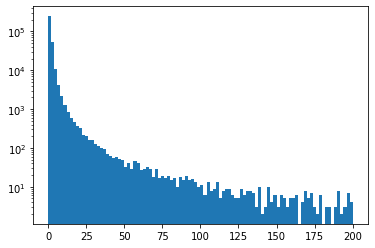

In [21]:
degrees = np.array([full_g.degree(node) for node in full_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=100);
plt.semilogy();

Recortamos el grafo para quedarnos con los nodos "influencers":

In [22]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [23]:
g = subgraph_strong_nodes(full_g, 5)

print("Nos quedan {:.2f}M nodos (antes eran {:.2f}M)".format(
    len(g.nodes) / 1e6,
    len(full_g.nodes) / 1e6
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 0.02M nodos (antes eran 0.32M)
Componentes conexas = 1960


Cantidad de usuarios en las componentes conexas

In [24]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} usuarios".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} usuarios".format(sum(resto)))

Componentes conexas = 1960
Componente 0  --> 14668  usuarios
Restantes     --> 2156   usuarios


Nos quedamos solo con la componente más significativa:

In [25]:
g = g.subgraph(components[0])

### Ejercicio 5

In [26]:
def tienenMasDeNEnComun(tweet1, tweet2, n):
    t1 = set(tweet1.split(" "))
    t2 = set(tweet2.split(" "))
    return len(t1.intersection(t2)) > n

In [27]:
print(len(feminism))
print(len(feminism["full_text2"].unique()))

634383
216346


In [28]:
no_retweets = feminism[feminism["tweet.retweeted_status.user.id_str"].isnull()]
no_retweets.shape
no_retweets.head()

(172737, 43)

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2,category
0,ObjectId(5e1f36e5914caa46502ba871),sexism,Wed Jan 15 15:58:24 +0000 2020,1217476132041150465,"@TwoHatsHegemon @JessicaLBYRD Women witnessed Bernie attack Hillary in sexist ways in the 2016 primary. Women hid in private Facebook groups to hide from the public vitriol of the Bernie Bros. So, when Warren says something that talks of Bernie’s sexism, the 2016 primary is proof that he is sexist.",NaN,NaN,"[30,299]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""TwoHatsHegemon"",""name"":""Samuel Bennett"",""id"":462247315,""id_str"":""462247315"",""indices"":[0,15]},{""screen_name"":""JessicaLBYRD"",""name"":""Jessica Byrd"",""id"":49759849,""id_str"":""49759849"",""indices"":[16,29]}],""urls"":[]}",394202170,D,m1ssw0rld,NaN,False,3,12,0,NaN,20,Wed Oct 19 18:36:29 +0000 2011,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@TwoHatsHegemon @JessicaLBYRD Women witnessed Bernie attack Hillary in sexist ways in the 2016 primary. Women hid in private Facebook groups to hide from the public vitriol of the Bernie Bros. So, when Warren says something that talks of Bernie’s sexism, the 2016 primary is proof that he is sexist.","@TwoHatsHegemon @JessicaLBYRD Women witnessed Bernie attack Hillary in sexist ways in the 2016 primary. Women hid in private Facebook groups to hide from the public vitriol of the Bernie Bros. So, when Warren says something that talks of Bernie’s sexism, the 2016 primary is proof that he is sexist.",1
7,ObjectId(5e1f36e5914caa46502ba893),sexism,Wed Jan 15 15:58:00 +0000 2020,1217476033198292992,"@MMFlint Warren is snake 🐍 🐍🐍\n\nIdc what ANYONE SAYS. What she did was uncalled for and down right disgusting tactics to use. I mean to weaponise sexism against someone you call your “close friend”, how the hell dare you?! \n\nBernie asked you to run in 2015!!",NaN,NaN,"[9,257]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""MMFlint"",""name"":""Michael Moore"",""id"":20479813,""id_str"":""20479813"",""indices"":[0,8]}],""urls"":[]}",306665442,jayceon,Whoop_Tweets,NaN,False,168,128,1,NaN,38212,Sat May 28 07:54:34 +0000 2011,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@MMFlint Warren is snake 🐍 🐍🐍\n\nIdc what ANYONE SAYS. What she did was uncalled for and down right disgusting tactics to use. I mean to weaponise sexism against someone you call your “close friend”, how the hell dare you?! \n\nBernie asked you to run in 2015!!","@MMFlint Warren is snake 🐍 🐍🐍\n\nIdc what ANYONE SAYS. What she did was uncalled for and down right disgusting tactics to use. I mean to weaponise sexism against someone you call your “close friend”, how the hell dare you?! \n\nBernie asked you to run in 2015!!",1
8,ObjectId(5e1f36ea914caa46502baa1b),#sexism,Wed Jan 15 14:09:57 +0000 2020,1217448842901110786,@peterdao

In [29]:
#Codigo original, se duplican las comparaciones entre los tweets
tweet_g = nx.Graph()
vertex_ids = set()
result = []

for tweet1 in no_retweets["full_text2"][:1000]:
    for tweet2 in no_retweets["full_text2"][:1000]:
      if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
        #Se agrego este result.append para revisar cuantas comparaciones se estan realizando.
        result.append(str(tweet1)+","+str(tweet2))
        tweet_g.add_edge(tweet1,tweet2)   

n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))
print("Total de iteraciones resultado funcion actual: "+str(len(result)))  

Nodos: 152
Ejes: 184
Total de iteraciones resultado funcion actual: 368


In [30]:
#Codigo un poco mas eficiente. No repite las comparaciones de tweets.
tweet_g = nx.Graph()
vertex_ids = set()

#Variable auxiliar para ver cuantas comparaciones se estan haciendo al final del ultimo if
result = []

#Indice para tweet1
i = 0

#Indice para tweet2
j = 0

for tweet1 in no_retweets["full_text2"][:1000]:
  i+= 1
  j = 0
  for tweet2 in no_retweets["full_text2"][:1000]:
    j+= 1
    if i != j and i < j :
        if(tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
          result.append(str(tweet1)+","+str(tweet2))
          tweet_g.add_edge(tweet1,tweet2)   

n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))         
print("Total de iteraciones resultado funcion mejorada: "+str(len(result)))

Nodos: 152
Ejes: 184
Total de iteraciones resultado funcion mejorada: 184


Podemos observar que tanto la funcion mejorada como el código original, dan el mismo resultado de grafos. Sin embargo el segundo bloque es más eficiente, ya que realiza la mitad de comparaciones lógicas para obtener los resultados. Entiendo que al armar los nodos, si los mismos estan repetidos, en realidad se estan sobreescribiendo, por lo cual el resultado no se modifica.

#### Comenzamos a generar un nuevo Grafo con mayor cantidad de Tweets para obtener mejores resultados

In [31]:
# Mismo codigo anterior con identico resultado, solo que se utilizan de forma diferente los incrementales en la iteracion
import networkx as nx

tweet_g = nx.Graph()
vertex_ids = set()

i=0
j=0
for tweet1 in no_retweets["full_text2"][:10000]:
    for tweet2 in no_retweets["full_text2"][i:10000]:
        if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
            tweet_g.add_edge(tweet1,tweet2)  
            j+=1
    i+=1


n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))
print("Total de iteraciones resultado funcion mejorada: "+str(j))

Nodos: 2472
Ejes: 12750
Total de iteraciones resultado funcion mejorada: 12764


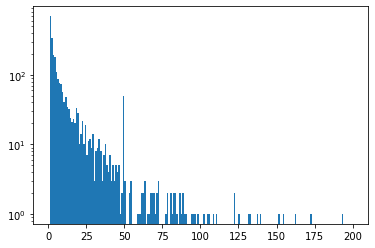

In [32]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

degrees = np.array([tweet_g.degree(node) for node in tweet_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=200);
plt.semilogy();

De acuerdo al grafico anterior, observamos que tenemos menos de 1000 tweets con tan solo una arista, y que tenemos 1 solo tweet con casi 200 aristas.

Recortamos el Grafo, quitando los nodos con menos de 3 aristas.

In [33]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [34]:
g = subgraph_strong_nodes(tweet_g, 5)

print("Nos quedan {:.2f} nodos (antes eran {:.2f})".format(
    len(g.nodes),
    len(tweet_g.nodes)
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 1062.00 nodos (antes eran 2472.00)
Componentes conexas = 10


In [35]:
print(nx.number_connected_components(g))

10


In [36]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} tweets".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} tweets".format(sum(resto)))
print("Mayor componente conexa del resto = {}".format(max(resto)))

Componentes conexas = 10
Componente 0  --> 930    tweets
Restantes     --> 132    tweets
Mayor componente conexa del resto = 50


In [37]:
g = g.subgraph(components[0])

In [38]:
nx.write_gexf(g, "aborto.gexf")